In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

In [5]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [8]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [9]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


# Cleaning the data

In [12]:
df.drop_duplicates(inplace=True)

# Convert to string before using .str accessor
df['price'] = df['price'].astype(str)
df['service fee'] = df['service fee'].astype(str)

df['price'] = df['price'].str.replace('$', '', regex=False)
df['service fee'] = df['service fee'].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].str.replace(',', '', regex=False)

df.rename(columns={
    'price' : 'price_$',
    'service fee': 'service_fee_$'
    }, inplace=True)

# Drop NaNs after string cleaning
df.dropna(inplace=True)

df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float) # Corrected column name
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int) # Corrected column name

df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'
df = df.drop(df[df['availability 365'] > 500].index)

In [14]:
df.duplicated().value_counts()

,count
False,83796


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83796 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83796 non-null  object        
 1   NAME                            83796 non-null  object        
 2   host id                         83796 non-null  object        
 3   host_identity_verified          83796 non-null  object        
 4   host name                       83796 non-null  object        
 5   neighbourhood group             83796 non-null  object        
 6   neighbourhood                   83796 non-null  object        
 7   lat                             83796 non-null  float64       
 8   long                            83796 non-null  float64       
 9   country                         83796 non-null  object        
 10  country code                    83796 non-null  object        
 11  instan

In [16]:
# Exploratory data Analysis(EDA)
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83796.000000,83796.000000,83796.000000,83796.000000,83596.000000,83567.000000,83796.000000,83796.000000,83796,83796.000000,83796.000000,83796.000000,83796.000000
mean,40.727353,-73.948502,0.497721,2012.489522,626.342457,125.232436,7.436775,32.226622,2019-06-09 15:15:53.229271296,1.375596,3.278820,7.049907,141.759153
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721335,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930790,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056317,0.050338,0.499998,5.760523,331.809388,66.357813,28.122911,51.897899,NaN,1.749446,1.283724,29.568700,133.408285


In [17]:
property_type = df['room type'].value_counts().to_frame()
property_type

,count
room type,
Entire home/apt,44367
Private room,37664
Shared room,1655
Hotel room,110


In [19]:
room_type_bar = px.bar(property_type, x=property_type.index, y="count", title='Room Type Distribution');
room_type_bar.show()

In [20]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34780
Manhattan,34735
Queens,11184
Bronx,2276
Staten Island,821


In [21]:
hood_group_bar = px.bar(hood_group, x=hood_group.index, y="count", title='Neighborhood Group Distribution');
hood_group_bar.show()

In [22]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().to_frame()
avg_price

,price_$
neighbourhood group,
Bronx,630.343901
Brooklyn,627.717002
Manhattan,623.446847
Queens,630.535365
Staten Island,622.372861


In [24]:
avg_price_bar = px.bar(avg_price, x=avg_price.index, y="price_$", title='Average Price by Neighborhood Group');
avg_price_bar.show()

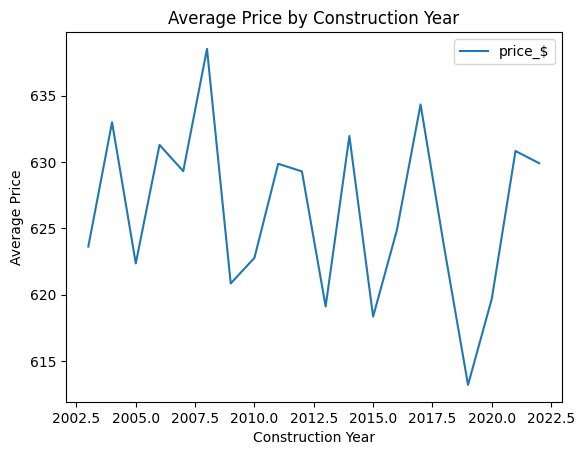

In [25]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price');
plt.title('Average Price by Construction Year');

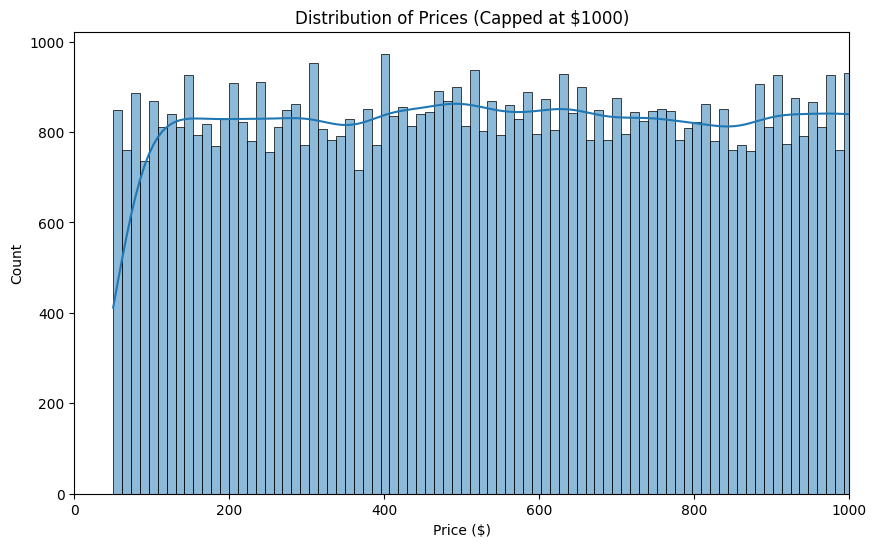

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df['price_$'], bins=100, kde=True)
plt.xlim(0, 1000)  # cap to reasonable range
plt.title("Distribution of Prices (Capped at $1000)")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

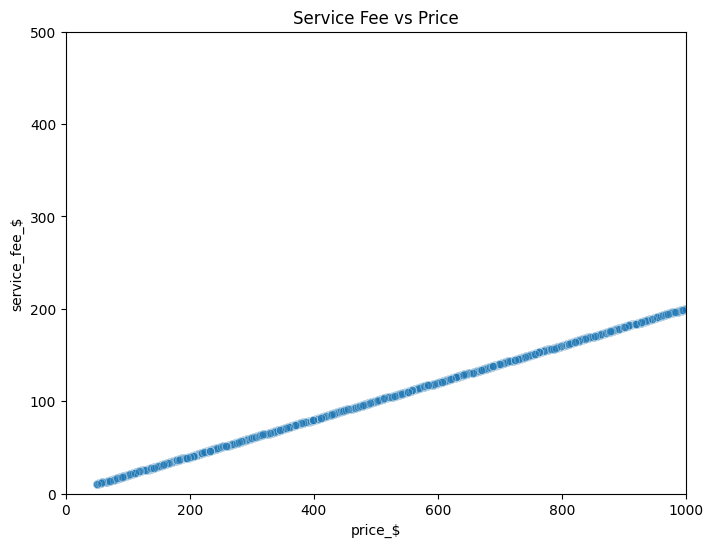

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="price_$", y="service_fee_$", data=df, alpha=0.4)
plt.xlim(0, 1000)
plt.ylim(0, 500)
plt.title("Service Fee vs Price")
plt.show()

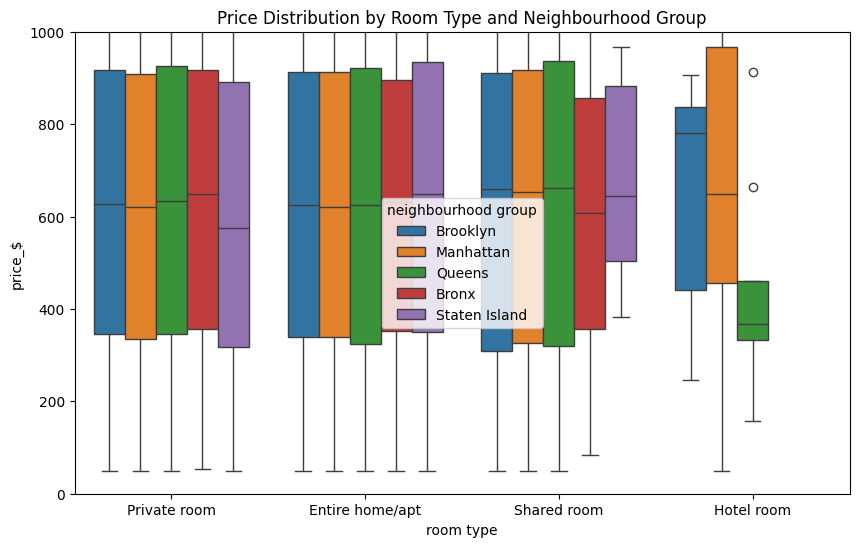

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x="room type", y="price_$", hue="neighbourhood group", data=df)
plt.ylim(0, 1000)
plt.title("Price Distribution by Room Type and Neighbourhood Group")
plt.show()

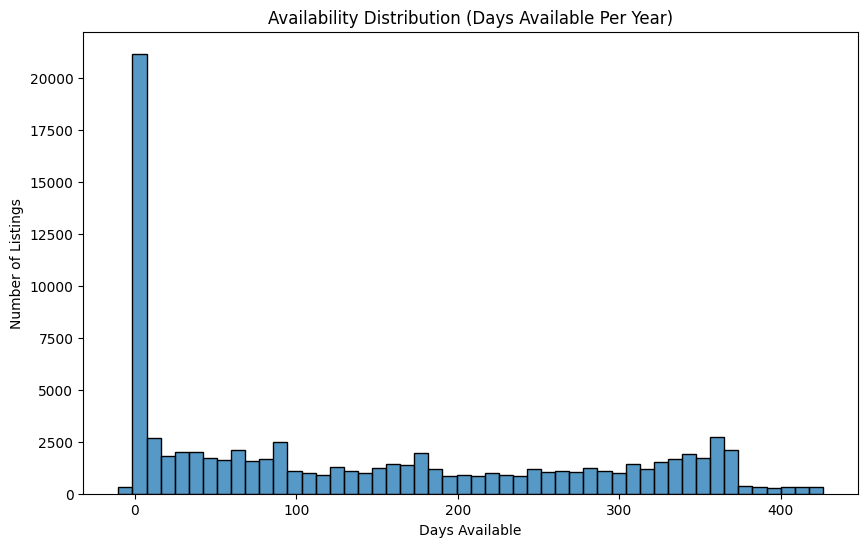

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df['availability 365'], bins=50, kde=False)
plt.title("Availability Distribution (Days Available Per Year)")
plt.xlabel("Days Available")
plt.ylabel("Number of Listings")
plt.show()

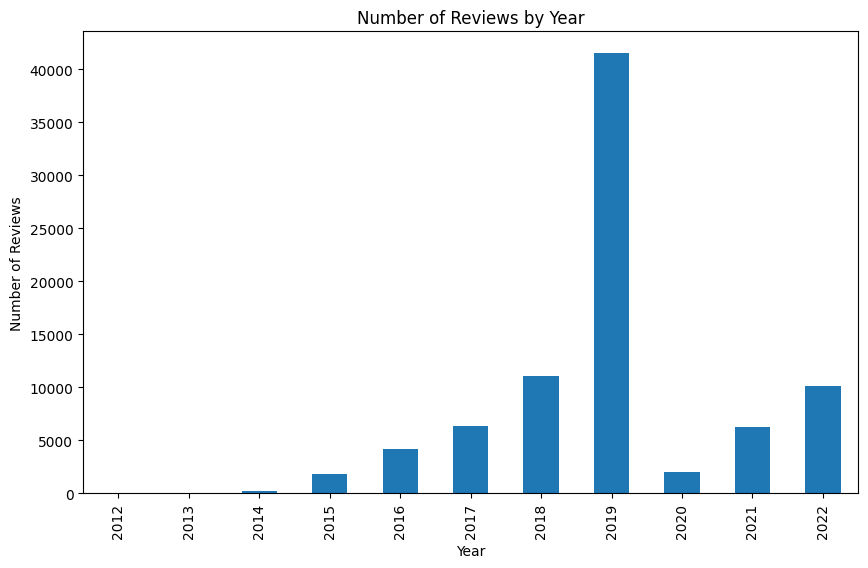

In [30]:
reviews_by_year = df['last review'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10,6))
reviews_by_year.plot(kind='bar')
plt.title("Number of Reviews by Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()


In [31]:
top_hosts = df['host id'].value_counts().head(10).to_frame()
top_hosts.columns = ["listing_count"]

top_hosts_bar = px.bar(top_hosts, x=top_hosts.index, y="listing_count",
                       title="Top 10 Hosts by Number of Listings")
top_hosts_bar.show()


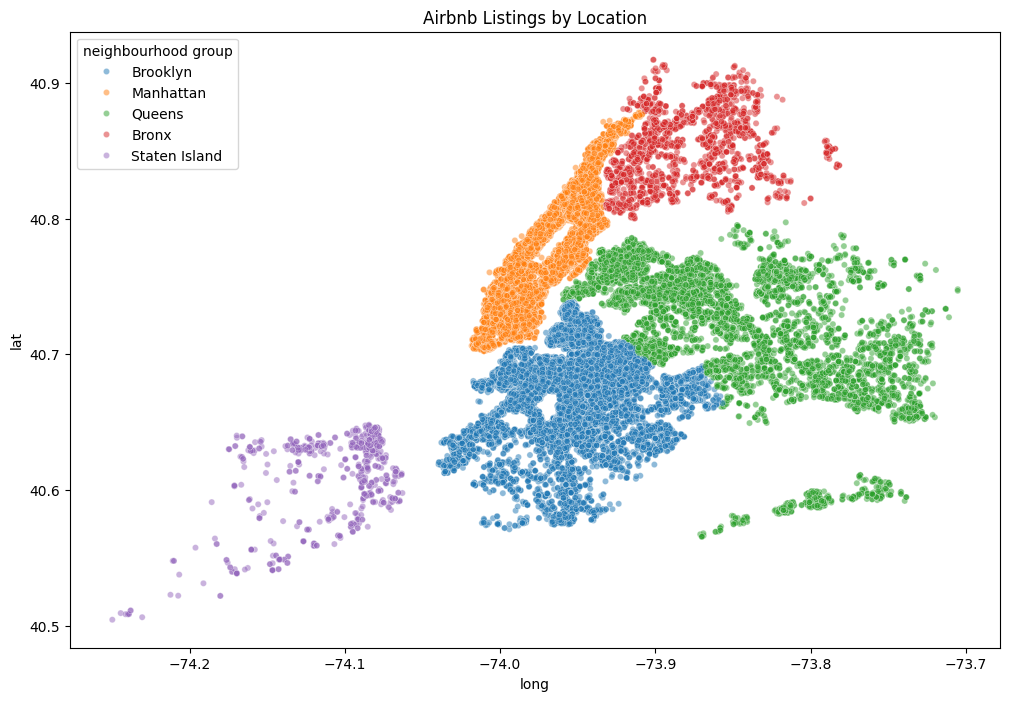

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="long", y="lat", hue="neighbourhood group",
                data=df, alpha=0.5, s=20)
plt.title("Airbnb Listings by Location")
plt.show()

In [36]:
df_cleaned = df.dropna(subset=['price_$'])
fig = px.scatter_mapbox(
    df_cleaned.sample(2000),  # sample for performance
    lat="lat", lon="long",
    color="neighbourhood group",
    size="price_$",
    hover_name="room type",
    hover_data=["price_$", "service_fee_$"],
    mapbox_style="carto-positron",
    zoom=10,
    title="Airbnb Listings Distribution"
)
fig.show()